# Complete error estimation  

In [24]:
import numpy as np
import matplotlib.pyplot
import pymc3 as pm
import pandas as pd
import scipy.special
import scipy.stats
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../../')
import mwc.viz
import mwc.bayes
import mwc.stats
colors = mwc.viz.personal_style()
np.random.seed(666)
%matplotlib inline

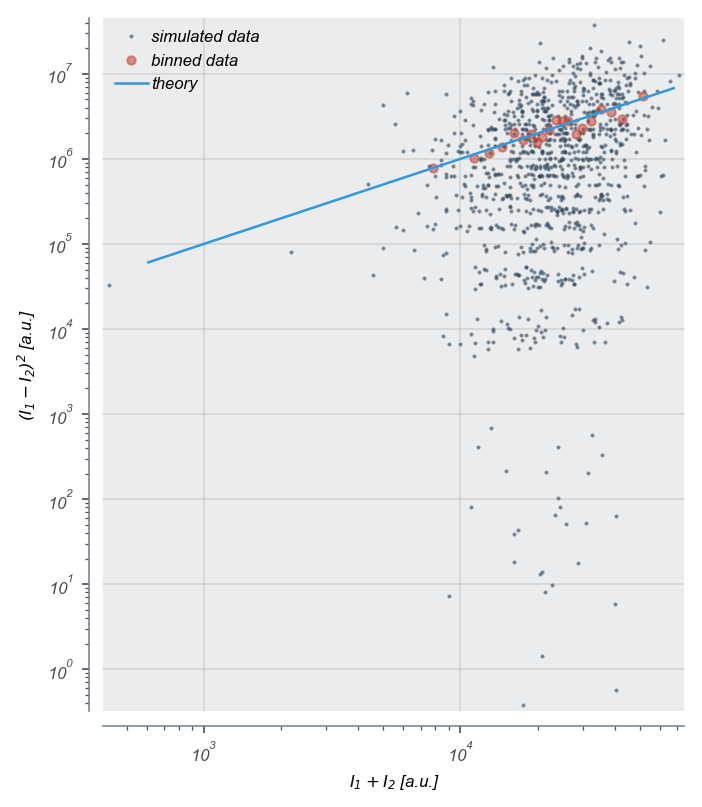

In [28]:
# Simulate the data.
num_div = 1000
ntot = np.random.gamma(5, 50, size=num_div).astype(int)
n1 = np.random.binomial(ntot, p=0.5)
n2 = ntot - n1

# Define alpha with measurement noise. 
alpha_true = 100
err = 10

# Compute the intensities.
i1 = alpha_true * n1 + np.random.normal(0, err, size=num_div)
i2 = alpha_true * n2 + np.random.normal(0, err, size=num_div)
itot = i1 + i2

# Make a dataframe. 
df = pd.DataFrame(np.array([i1, i2, i1 + i2, (i1 - i2)**2]).T, 
                 columns=['I_1', 'I_2', 'summed', 'fluct'])

# Bin the data
bin_size = 50 
bin_dict = mwc.stats.bin_by_events(df, 50)

# Compute the theory. 
i_tot_range = np.linspace(itot.min(), itot.max(), 500)
theo = alpha_true * i_tot_range
# Plot the data. 
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$I_1 + I_2$ [a.u.]')
ax.set_ylabel('$(I_1 - I_2)^2$ [a.u.]')
_ = ax.plot(i1 + i1, (i1 - i2)**2, '.', ms=2, alpha=0.5, label='simulated data')
_ = ax.plot(bin_dict['summed'], bin_dict['fluct'], '.', ms=8, alpha=0.5, label='binned data')
_ = ax.plot(i_tot_range, theo, label='theory')
_ = ax.legend()
mwc.viz.format_axes()

In [16]:
# Define the log posterior.
def error_log_posterior(alpha, n1, ntot, sigma, I_1, I_2, neg=False):
    if neg == True:
        prefactor = -1
    else:
        prefactor = 1
    if alpha < 0:
        return -prefactor * np.inf()
    
    if (n1 > ntot).any():
        return prefactor * -np.inf()
    
    if (n1 < 0).any() or (n_tot < 0 ).any(): 
        return prefactor * -np.inf()
   
    k = len(I_1)
    # Compute the predicted means.
    mu1 = alpha * n1
    mu2 = alpha * (ntot - n1)
    
    

742